## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[128, 128, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.99, 0.1]
redice_lr_patient = [3,5]

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.99, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 6s 111us/step - loss: 1.4416 - acc: 0.4921 - val_loss: 1.5511 - val_acc: 0.4569
Epoch 12/25
50000/50000 [==============================] - 6s 114us/step - loss: 1.4215 - acc: 0.4992 - val_loss: 1.5481 - val_acc: 0.4583
Epoch 13/25
50000/50000 [==============================] - 6s 112us/step - loss: 1.4042 - acc: 0.5063 - val_loss: 1.5333 - val_acc: 0.4620
Epoch 14/25
50000/50000 [==============================] - 6s 114us/step - loss: 1.3892 - acc: 0.5122 - val_loss: 1.5216 - val_acc: 0.4633
Epoch 15/25
50000/50000 [==============================] - 6s 119us/step - loss: 1.3726 - acc: 0.5176 - val_loss: 1.5143 - val_acc: 0.4695
Epoch 16/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.3567 - acc: 0.5234 - val_loss: 1.5132 - val_acc: 0.4607
Epoch 17/25
50000/50000 [==============================] - 6s 119us/step - loss: 1.3431 - acc: 0.5283 - val_loss: 1.5097 - val_acc: 0.4686
Epoch 18/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 16s 325us/step - loss: 2.2627 - acc: 0.2470 - val_loss: 2.2194 - val_acc: 0.2793
Epoch 2/25
50000/50000 [==============================] - 10s 192us/step - loss: 1.8330 - acc: 0.3578 - val_loss: 1.8806 - val_acc: 0.3555
Epoch 3/25
50000/50000 [==============================] - 10s 192us/step - loss: 1.7188 - acc: 0.3960 - val_loss: 1.7707 - val_acc: 0.3912
Epoch 4/25
50000/50000 [==============================] - 10s 209us/step - loss: 1.6539 - acc: 0.4197 - val_loss: 1.7476 - val_acc: 0.3878
Epoch 5/25
50000/50000 [==============================] - 10s 199us/step - loss: 1.6076 - acc: 0.4344 - val_loss: 1.6698 - val_acc: 0.4169
Epoch 6/25
50000/50000 [==============================] - 10s 190us/step - loss: 1.5700 - acc: 0.4480 - val_loss: 1.6454 - val_acc: 0.4232
Epoch 7/25
50000/50000 [==============================] - 10s 190us/step - loss: 1.5351 - acc: 0.4610 - val_loss: 1.

50000/50000 [==============================] - 26s 523us/step - loss: 0.8474 - acc: 0.7031 - val_loss: 2.0231 - val_acc: 0.4215
Epoch 22/25
50000/50000 [==============================] - 22s 450us/step - loss: 0.8173 - acc: 0.7147 - val_loss: 1.6732 - val_acc: 0.4651
Epoch 23/25
50000/50000 [==============================] - 15s 307us/step - loss: 0.8012 - acc: 0.7207 - val_loss: 1.7785 - val_acc: 0.4432

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.0009414802846731617.
Epoch 24/25
50000/50000 [==============================] - 15s 304us/step - loss: 0.7856 - acc: 0.7254 - val_loss: 1.8330 - val_acc: 0.4386
Epoch 25/25
50000/50000 [==============================] - 14s 288us/step - loss: 0.7680 - acc: 0.7336 - val_loss: 2.0409 - val_acc: 0.4144
Numbers of exp: 5, reduce_factor: 0.99, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)

50000/50000 [==============================] - 12s 243us/step - loss: 1.3245 - acc: 0.5311 - val_loss: 1.5342 - val_acc: 0.4554
Epoch 7/25
50000/50000 [==============================] - 13s 264us/step - loss: 1.2852 - acc: 0.5442 - val_loss: 1.4986 - val_acc: 0.4656
Epoch 8/25
50000/50000 [==============================] - 20s 403us/step - loss: 1.2480 - acc: 0.5570 - val_loss: 1.4493 - val_acc: 0.4841
Epoch 9/25
50000/50000 [==============================] - 24s 480us/step - loss: 1.2169 - acc: 0.5675 - val_loss: 1.5266 - val_acc: 0.4637
Epoch 10/25
50000/50000 [==============================] - 19s 381us/step - loss: 1.1870 - acc: 0.5796 - val_loss: 1.4289 - val_acc: 0.4980
Epoch 11/25
50000/50000 [==============================] - 13s 270us/step - loss: 1.1634 - acc: 0.5891 - val_loss: 1.5580 - val_acc: 0.4627
Epoch 12/25
50000/50000 [==============================] - 12s 247us/step - loss: 1.1321 - acc: 0.6000 - val_loss: 1.4866 - val_acc: 0.4757
Epoch 13/25
50000/50000 [==========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 20s 394us/step - loss: 1.8240 - acc: 0.3658 - val_loss: 2.0749 - val_acc: 0.3120
Epoch 2/25
50000/50000 [==============================] - 16s 325us/step - loss: 1.5537 - acc: 0.4540 - val_loss: 2.2030 - val_acc: 0.3220
Epoch 3/25
50000/50000 [==============================] - 19s 376us/step - loss: 1.4538 - acc: 0.4860 - val_loss: 2.0611 - val_acc: 0.3381
Epoch 4/25
50000/50000 [==============================] - 16s 321us/step - loss: 1.3903 - acc: 0.5100 - val_loss: 2.2113 - val_acc: 0.2974
Epoch 5/25
50000/50000 [==============================] - 17s 342us/step - loss: 1.3385 - acc: 0.5260 - val_loss: 1.9357 - val_acc: 0.3593
Epoch 6/25
50000/50000 [==============================] - 25s 504us/step - loss: 1.2932 - acc: 0.5434 - val_loss: 1.8971 - val_acc: 0.3745
Epoch 7/25
50000/50000 [==============================] - 15s 301us/step - loss: 1.2518 - acc: 0.5562 - val_loss: 1.

50000/50000 [==============================] - 9s 179us/step - loss: 0.9652 - acc: 0.6591 - val_loss: 1.7961 - val_acc: 0.4139
Epoch 21/25
50000/50000 [==============================] - 9s 186us/step - loss: 0.9493 - acc: 0.6673 - val_loss: 2.1610 - val_acc: 0.3675
Epoch 22/25
50000/50000 [==============================] - 9s 172us/step - loss: 0.9338 - acc: 0.6718 - val_loss: 1.9155 - val_acc: 0.3995
Epoch 23/25
50000/50000 [==============================] - 8s 164us/step - loss: 0.9171 - acc: 0.6788 - val_loss: 1.7961 - val_acc: 0.4224
Epoch 24/25
50000/50000 [==============================] - 8s 168us/step - loss: 0.9051 - acc: 0.6833 - val_loss: 1.7473 - val_acc: 0.4495

Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.0009320654743351042.
Epoch 25/25
50000/50000 [==============================] - 9s 171us/step - loss: 0.8856 - acc: 0.6898 - val_loss: 1.8055 - val_acc: 0.4287
Numbers of exp: 10, reduce_factor: 0.10, reduce_patient: 3
______________________________________

50000/50000 [==============================] - 8s 158us/step - loss: 3.0601 - acc: 0.1053 - val_loss: 3.0401 - val_acc: 0.1064
Epoch 5/25
50000/50000 [==============================] - 8s 166us/step - loss: 3.0524 - acc: 0.1058 - val_loss: 3.0333 - val_acc: 0.1069
Epoch 6/25
50000/50000 [==============================] - 8s 161us/step - loss: 3.0465 - acc: 0.1077 - val_loss: 3.0268 - val_acc: 0.1072
Epoch 7/25
50000/50000 [==============================] - 8s 164us/step - loss: 3.0406 - acc: 0.1074 - val_loss: 3.0204 - val_acc: 0.1073
Epoch 8/25
50000/50000 [==============================] - 8s 162us/step - loss: 3.0345 - acc: 0.1084 - val_loss: 3.0141 - val_acc: 0.1088
Epoch 9/25
50000/50000 [==============================] - 8s 165us/step - loss: 3.0279 - acc: 0.1085 - val_loss: 3.0077 - val_acc: 0.1095
Epoch 10/25
50000/50000 [==============================] - 10s 193us/step - loss: 3.0214 - acc: 0.1095 - val_loss: 3.0015 - val_acc: 0.1103
Epoch 11/25
50000/50000 [==================

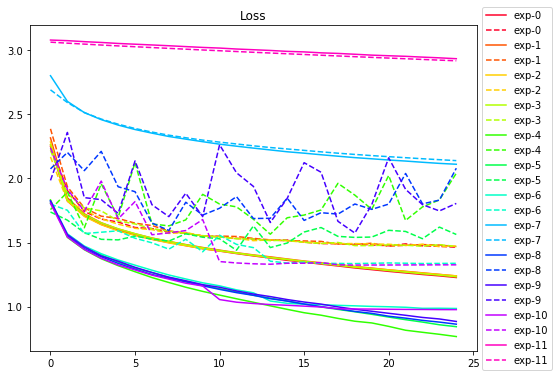

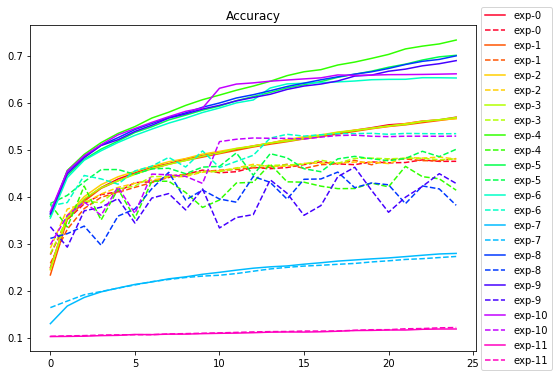

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()